# Инициализация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('data/stud_math.csv')

# Первичный анализ

In [2]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего 395 строк и 30 столбцов.

В некоторых столбцах не хватает данных.

## Легенда

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери:
    - 'teacher' - учитель, 
    - 'health' - сфера здравоохранения, 
    - 'services' - гос служба, 
    - 'at_home' - не работает, 
    - 'other' - другое
10. Fjob — работа отца:
    - 'teacher' - учитель
    - 'health' - сфера здравоохранения
    - 'services' - гос служба
    - 'at_home' - не работает
    - 'other' - другое
11. reason — причина выбора школы:
    - 'home' - близость к дому
    - 'reputation' - репутация школы
    - 'course' - образовательная программа
    - 'other' - другое
12. guardian — опекун:
    - 'mother' - мать 
    - 'father' - отец 
    - 'other' - другое
13. traveltime — время в пути до школы, мин:
    - 1 <15
    - 2 - 15-30 
    - 3 - 30-60
    - 4 - \>60
14. studytime — время на учёбу помимо школы в неделю, часов:
    - 1 - <2 
    - 2 - 2-5 
    - 3 - 5-10 
    - 4 - \>10
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

Для удобства приведем имена столбцов к нижнему регистру и уберем запятые

In [3]:
stud.columns = list(map(lambda s: (s.replace(', ', '_').lower() if ', ' in s else s.lower()),list(stud.columns)))
display(list(stud.columns))

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'studytime_granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

## School

Посмотрим столько школ в нашем датасете

In [4]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


Всего представлено 2 школы

## Sex

Посмотрим столько мальчиков и девочек в нашем датасете

In [5]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

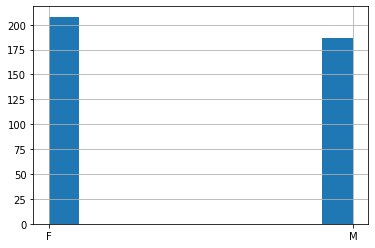

In [6]:
stud.sex.hist()

## Age

In [7]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

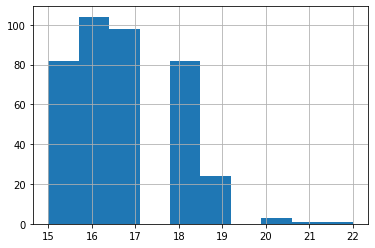

In [8]:
stud.age.hist()
# stud.age.describe()

Некоторые значения лежат в стороне от основной массы, определим не являются ли они выбросом.
Самый простой стопоб — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,
где IQR = percentile(75) - percentile(25).

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


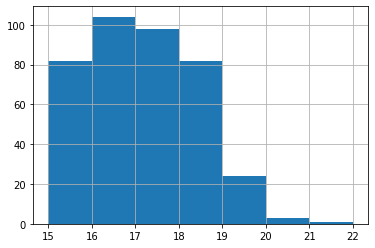

In [9]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 7, range = (15, 22))


Согласно формуле возраст 22 является выбросом.

## address

Сразу уберем пропуски nan на None

In [15]:
stud.address = stud.address.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
stud.address.value_counts()

U       295
R        83
None     17
Name: address, dtype: int64

В датасете имеется 17 пропусков, 295 городских учеников и 83 сельской местности

## famsize

In [19]:
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
stud.famsize.value_counts()

GT3     261
LE3     107
None     27
Name: famsize, dtype: int64

У большинства учеников больше 3х членов семьи, в датасете 27 пропусков

## pstatus

T       314
None     45
A        36
Name: pstatus, dtype: int64

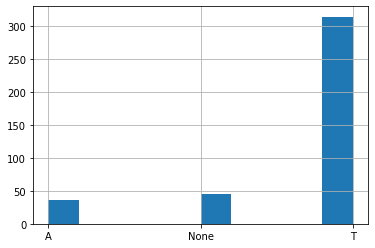

In [25]:
stud.pstatus = stud.pstatus.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
display(stud.pstatus.value_counts())
stud.pstatus.hist()

Большиство полных семей, 45 пустых записей.

## medu

In [26]:
stud.medu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

заменим nan на none

In [28]:
stud.medu = stud.medu.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
display(stud.medu.value_counts())

4.0     131
2.0     102
3.0      97
1.0      59
0.0       3
None      3
Name: medu, dtype: int64

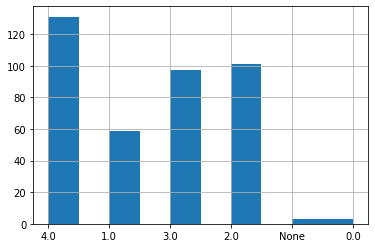

In [42]:
stud.medu.hist()

## fedu

In [39]:
stud.fedu.unique()

array(['4.0', '1.0', '2.0', '3.0', None, '0.0'], dtype=object)

заменим nan на none

In [40]:
и

2.0     106
3.0      96
4.0      88
1.0      78
None     24
0.0       2
Name: fedu, dtype: int64

Одно из значений выбивается из легенды, отбросим его


In [41]:
stud = stud.loc[stud.fedu != '40.0']
display(stud.fedu.value_counts())

2.0     106
3.0      96
4.0      88
1.0      78
None     24
0.0       2
Name: fedu, dtype: int64

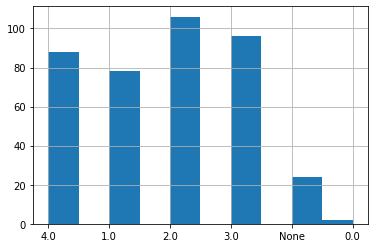

In [43]:
stud.fedu.hist()

Мамы более образованные чем папы

## mjob & fjob

In [48]:
display(stud.mjob.unique())
display(stud.fjob.unique())

array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

Заменим пропуски

In [50]:
stud.mjob = stud.mjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
stud.fjob = stud.fjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
display(stud.mjob.value_counts())
display(stud.fjob.value_counts())

other       133
services     97
at_home      58
teacher      55
health       32
None         19
Name: mjob, dtype: int64

other       196
services    102
None         36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

## reason

In [51]:
display(stud.reason.unique())

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

Заменим пропуски

In [59]:
stud.reason = stud.reason.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
display(stud.reason.value_counts())

course        137
home          104
reputation    102
other          34
None           17
Name: reason, dtype: int64

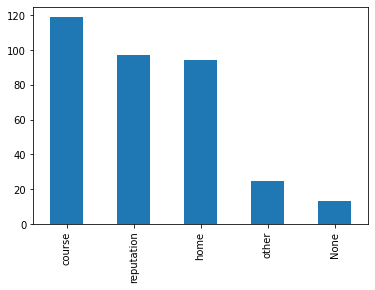

In [78]:
stud[(stud.school == 'GP')]['reason'].value_counts().plot(kind = 'bar')

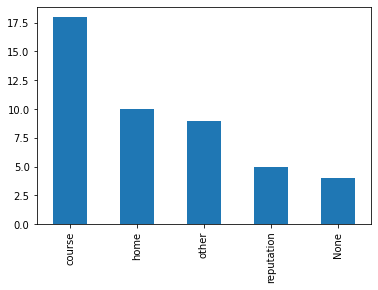

In [79]:
stud[(stud.school == 'MS')]['reason'].value_counts().plot(kind = 'bar')